# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

With the new format of the SAT, the College Board needs to come up with some strategies on how to best allocate money to improve SAT participation rates. In this report, we must analyze data from the 2017 and 2018 SAT exams and ACT exams from across the country. With our findings, we will present strategies on how to improve overall SAT rates for upcoming years by focusing on a small group states. 

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
#Imports:
import pandas as pd

In [2]:
act_2017 = pd.read_csv("..\\data\\act_2017.csv")
act_2018 = pd.read_csv("..\\data\\act_2018.csv")
sat_2017 = pd.read_csv("..\\data\\sat_2017.csv")
sat_2018 = pd.read_csv("..\\data\\sat_2018.csv")

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [3]:
sat_2017 = pd.read_csv("..\\data\\sat_2017.csv")

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [4]:
sat_2017.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

This will be a data set of SAT scores by the state. The data shows the participation rate of students in the state who took the SAT. The data then shows the average Reading & Writing and Math score of those students who took the SAT in their state. And in the final column is the sum of each states average Reading/Wring and Math score. The states are listed in alphabetical order. Some states had an SAT participation rate as low as 3% while many other states had 100% participation. 

#### 4a. Does the data look complete? 

Yes

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

<b>Answer: </b>For the SAT, the lowest score a student can score on each section is 200. The minimum overall score for the SAT is 400. The maximum score a student can score on each section is 800. The maximum overall score of the SAT is 1600

The highest score a student can recieve on the ACT is 36. Each section on the ACT is also scored out of 36 points. The lowest points you can receive on a section is 1; therefore the lowest overall score on the ACT is 1.

In [5]:
#2017 SAT minimum scores of test/substest
print(sat_2017['Evidence-Based Reading and Writing'].min())
print(sat_2017['Math'].min())
print(sat_2017['Total'].min())

482
52
950


In [6]:
#2017 SAT maximum scores of test/substest
print(sat_2017['Evidence-Based Reading and Writing'].max())
print(sat_2017['Math'].max())
print(sat_2017['Total'].max())

644
651
1295


In [7]:
#2017 ACT minimum scores of test/substest
print(act_2017['English'].min())
print(act_2017['Math'].min())
print(act_2017['Reading'].min())
print(act_2017['Science'].min())
print(act_2017['Composite'].min()) #Overall Score

16.3
18.0
18.1
2.3
17.8


In [8]:
#2017 ACT maximum scores of test/substest
print(act_2017['English'].max())
print(act_2017['Math'].max())
print(act_2017['Reading'].max())
print(act_2017['Science'].max())
print(act_2017['Composite'].max()) #Overall Score

25.5
25.3
26.0
24.9
25.5


#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [9]:
act_2017.replace(to_replace =[2.3],  
                            value =23.2, inplace = True)
#I hate Maryland

In [10]:
sat_2017.replace(to_replace =[52],  
                            value =524, inplace = True)
#maryland math does it again

#### 5. What are your data types? 
Display the data types of each feature. 

In [11]:
sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

A: Participation rates should be an integer

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [12]:
def conv_perc(x):
    new_var = int(x.split('%')[0])
    return new_var
#worked with Aerika Song 

In [13]:
sat_2017['Participation'] = sat_2017['Participation'].apply(conv_perc)

In [14]:
sat_2017

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5,593,572,1165
1,Alaska,38,547,533,1080
2,Arizona,30,563,553,1116
3,Arkansas,3,614,594,1208
4,California,53,531,524,1055
5,Colorado,11,606,595,1201
6,Connecticut,100,530,512,1041
7,Delaware,100,503,492,996
8,District of Columbia,100,482,468,950
9,Florida,83,520,497,1017


In [15]:
sat_2017.dtypes

State                                 object
Participation                          int64
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [16]:
act_2017['Participation'] = act_2017['Participation'].apply(conv_perc)

In [17]:
act_2017.dtypes

State             object
Participation      int64
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

- Fix any individual values preventing other columns from being the appropriate type.

In [18]:
def change_obj(x):
    act_comp = float(x.split('x')[0])
    return act_comp

In [19]:
act_2017['Composite'] = act_2017['Composite'].apply(change_obj)

In [20]:
act_2017.dtypes

State             object
Participation      int64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

- Finish your data modifications by making sure the columns are now typed appropriately.

- Display the data types again to confirm they are correct.

In [21]:
act_2018

,State,Participation,Composite
0,Alabama,100%,19.1
1,Alaska,33%,20.8
2,Arizona,66%,19.2
3,Arkansas,100%,19.4
4,California,27%,22.7
5,Colorado,30%,23.9
6,Connecticut,26%,25.6
7,Delaware,17%,23.8
8,District of columbia,32%,23.6
9,Florida,66%,19.9


#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [22]:
sat_2017.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5,593,572,1165
1,Alaska,38,547,533,1080
2,Arizona,30,563,553,1116
3,Arkansas,3,614,594,1208
4,California,53,531,524,1055


In [23]:
act_2017.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,60,20.3,20.7,21.4,21.0,21.0
1,Alabama,100,18.9,18.4,19.7,19.4,19.2
2,Alaska,65,18.7,19.8,20.4,19.9,19.8
3,Arizona,62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100,18.9,19.0,19.7,19.5,19.4


In [24]:
sat_2017.columns

Index(['State', 'Participation', 'Evidence-Based Reading and Writing', 'Math',
       'Total'],
      dtype='object')

In [25]:
sat_2017.rename(columns = {'State': 'sat_state',
           'Participation': 'sat_participation',
           'Evidence-Based Reading and Writing': 'sat_rw',
           'Math': 'sat_math',
           'Total': 'sat_totalscore'}, inplace = True)    

In [26]:
act_2017.rename(columns = {'State': 'act_state',
            'Participation': 'act_participation',
            'English':'act_english',
            'Math': 'act_math',
            'Reading': 'act_reading',
            'Science': 'act_science',
            'Composite': 'act_composite'}, inplace=True)

In [27]:
sat_2017.dtypes

sat_state            object
sat_participation     int64
sat_rw                int64
sat_math              int64
sat_totalscore        int64
dtype: object

In [28]:
act_2017.dtypes

act_state             object
act_participation      int64
act_english          float64
act_math             float64
act_reading          float64
act_science          float64
act_composite        float64
dtype: object

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| 


| Syntax | Description |
| ----------- | ----------- |
| Header | Title |
| Paragraph | Text |

| Column Name | Type | Dataset | Description |
| ------------|------|---------|-------------|
|state|object|SAT 2017|State where test was taken|
|sat_participation|integer|SAT 2017|percentage of SAT state student participation rate|
|sat_rw|integer|SAT 2017|State average SAT evidence based reading and writing score|
|sat_math|integer|SAT 2017|State average SAT math score|
|sat_total|integer|SAT 2017|Total SAT average SAT score|
|act_participation|integer|ACT 2017|percentage of ACT state student participation rate|
|act_english|float|ACT 2017|State average ACT English score|
|act_math|float|ACT 2017|State average ACT math score|
|act_reading|float|ACT 2017|State average ACT reading score|
|act_science|float|ACT 2017|State average ACT Science score|
|act_composite|float|ACT 2017|State ACT total average score|

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [29]:
#Dropped the first row of the ACT 2017 dataframe since it was labeled "National"
act_2017 = act_2017.drop([0])

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [30]:
#merged the act_2017 dataframe onto the sat_2017 dataframe based on the sat_state column
scores_2017 = pd.merge(sat_2017, act_2017, on=sat_2017['sat_state'], how='inner')
scores_2017.head()

,key_0,sat_state,sat_participation,sat_rw,sat_math,sat_totalscore,act_state,act_participation,act_english,act_math,act_reading,act_science,act_composite
0,Alabama,Alabama,5,593,572,1165,Alabama,100,18.9,18.4,19.7,19.4,19.2
1,Alaska,Alaska,38,547,533,1080,Alaska,65,18.7,19.8,20.4,19.9,19.8
2,Arizona,Arizona,30,563,553,1116,Arizona,62,18.6,19.8,20.1,19.8,19.7
3,Arkansas,Arkansas,3,614,594,1208,Arkansas,100,18.9,19.0,19.7,19.5,19.4
4,California,California,53,531,524,1055,California,31,22.5,22.7,23.1,22.2,22.8


In [31]:
#dropping the sat_state and act_state column in the new dataframe because we have a new index row
scores_2017 = scores_2017.drop(['sat_state', 'act_state'], axis=1)

In [32]:
#renaming the key_0 column to 'State'
scores_2017.rename(columns = {'key_0': 'state'}, inplace = True)

#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [107]:
#file saved in datafile as combined_2017.cs

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

# Checkng types in columns/fixing columns that need to be changed

In [35]:
print('SAT 2018 types')
print(sat_2018.dtypes)
print("---------------------------------")
print('ACT 2018 types')
print(act_2018.dtypes)
#need to change particpation types of each dataframe, and need to change the composite type of ACT 2018

SAT 2018 types
State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object
---------------------------------
ACT 2018 types
State             object
Participation     object
Composite        float64
dtype: object


In [36]:
#function that will (1) split an object on the '%' character and (2) turn the [0] indexed character into an integer
def conv_perc(x):
    new_var = int(x.split('%')[0])
    return new_var

In [37]:
#changing the SAT participation row into an integer
sat_2018['Participation'] = sat_2018['Participation'].apply(conv_perc)

In [38]:
#changing the ACT participation row into an integer
act_2018['Participation'] = act_2018['Participation'].apply(conv_perc)

# Renaming Columns

In [39]:
#renaming the columns in sat_2018 to be more specific
sat_2018.rename(columns = {'State': 'sat18_state',
           'Participation': 'sat18_participation',
           'Evidence-Based Reading and Writing': 'sat18_rw',
           'Math': 'sat18_math',
           'Total': 'sat18_totalscore'}, inplace = True)

In [40]:
#renaming the columns in act_2018 to be more specific
act_2018.rename(columns = {'State' : 'act18_state',
                          'Participation' : 'act18_participation',
                          'Composite' : 'act18_composite'
                          }, inplace = True)

# Making sure DataFrames have no extra rows

In [41]:
print(sat_2018.shape)
print(act_2018.shape)
#there is an extra row in the act_2018 dataframe

(51, 5)
(52, 3)


In [42]:
act_2018
#two rows for Maine index 20 & 21

,act18_state,act18_participation,act18_composite
0,Alabama,100,19.1
1,Alaska,33,20.8
2,Arizona,66,19.2
3,Arkansas,100,19.4
4,California,27,22.7
5,Colorado,30,23.9
6,Connecticut,26,25.6
7,Delaware,17,23.8
8,District of columbia,32,23.6
9,Florida,66,19.9


In [43]:
act_2018 = act_2018.drop([20])
#dropped the extra Maryland row

# Combine 2018 SAT and 2018 ACT Dataframes / Fix columns

In [44]:
#merging the act_2018 dataframe onto the sat_2018 dataframe on the sat18_state column
scores_2018 = pd.merge(sat_2018, act_2018, on=sat_2018['sat18_state'], how='inner')

In [45]:
#renaming the first column
scores_2018.rename(columns = {'key_0': 'state18'}, inplace = True)

In [46]:
#dropping the sat18_state and act18_state column since we renamed the first column
scores_2018 = scores_2018.drop(['sat18_state', 'act18_state'], axis=1)
scores_2018.head()

,state18,sat18_participation,sat18_rw,sat18_math,sat18_totalscore,act18_participation,act18_composite
0,Alabama,6,595,571,1166,100,19.1
1,Alaska,43,562,544,1106,33,20.8
2,Arizona,29,577,572,1149,66,19.2
3,Arkansas,5,592,576,1169,100,19.4
4,California,60,540,536,1076,27,22.7


# Create 2018 Data Dictionary

| Column Name | Type | Dataset | Description |
| ------------|------|---------|-------------|
|state18|object|SAT/ACT|State where test was taken|
|sat18_participation|integer|SAT 2018|percentage of SAT state student participation rate|
|sat18_rw|integer|SAT 2018|State average SAT evidence based reading and writing score|
|sat18_math|integer|SAT 2018|State average SAT math score|
|sat18_totalscore|integer|SAT 2018|Total SAT average score|
|act18_participation|integer|ACT 2018|percentage of ACT state student participation rate|
|act18_composite|float|ACT 2018|State overall ACT Score|

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [47]:
#combinging the scores_2018 column onto the scores_2017 column based on the state column
scores_1718 = pd.merge(scores_2017, scores_2018, on=scores_2017['state'], how = 'inner')
scores_1718.head()

,key_0,state,sat_participation,sat_rw,sat_math,sat_totalscore,act_participation,act_english,act_math,act_reading,act_science,act_composite,state18,sat18_participation,sat18_rw,sat18_math,sat18_totalscore,act18_participation,act18_composite
0,Alabama,Alabama,5,593,572,1165,100,18.9,18.4,19.7,19.4,19.2,Alabama,6,595,571,1166,100,19.1
1,Alaska,Alaska,38,547,533,1080,65,18.7,19.8,20.4,19.9,19.8,Alaska,43,562,544,1106,33,20.8
2,Arizona,Arizona,30,563,553,1116,62,18.6,19.8,20.1,19.8,19.7,Arizona,29,577,572,1149,66,19.2
3,Arkansas,Arkansas,3,614,594,1208,100,18.9,19.0,19.7,19.5,19.4,Arkansas,5,592,576,1169,100,19.4
4,California,California,53,531,524,1055,31,22.5,22.7,23.1,22.2,22.8,California,60,540,536,1076,27,22.7


In [48]:
#dropping the extra state columns from merged dataframes
scores_1718 = scores_1718.drop(['state','state18'], axis=1)

In [49]:
scores_1718.rename(columns = { 'key_0' : 'state',
        'sat_participation': 'sat17_participation',
           'sat_rw': 'sat17_rw',
           'sat_math': 'sat17_math',
           'sat_totalscore': 'sat17_totalscore',
           'act_participation': 'act17_participation', 'act_english' : 'act17_english',
            'act_math':'act17_math', 'act_reading': 'act17_reading',
            'act_science' : 'act17_science', 'act_composite' : 'act17_composite'}, inplace = True)

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [50]:
scores_1718.describe().T

,count,mean,std,min,25%,50%,75%,max
sat17_participation,51.0,39.803922,35.276632,2.0,4.00,38.0,66.00,100.0
sat17_rw,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0
sat17_math,51.0,556.882353,47.121395,468.0,523.50,548.0,599.00,651.0
sat17_totalscore,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0
act17_participation,51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0
act17_english,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5
act17_math,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3
act17_reading,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0
act17_science,51.0,21.450980,1.739353,18.2,19.95,21.3,23.20,24.9
act17_composite,51.0,21.519608,2.020695,17.8,19.80,21.4,23.60,25.5


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [51]:
scores_1718['sat18_math'].std()

47.77262322095955

In [52]:
def find_std(dataframe, column):
    standard_dev = dataframe[(str(column))].std()
    return standard_dev

In [53]:
#Code:

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Answer

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

<b>My Answer</b>
<b>Participation Analysis</b>

The states with the highest participation for the 2017 SAT is the District of Columbia, Michigan, Connecticut, and Delaware. All 4 states have 100% participation rate for the SAT. The states with the highest participation for the 2018 SAT was Colorado, Connecticut, Delaware, Michigan, and Idaho. These 5 states had a participation rate of 100%. Between the two years, Michigan, Connecticut, and Delaware maintained a 100% participation rate for the SAT.

Mississippi, North Dakota, and Iowa have the lowest state participation rate for the SAT at 2%. There are also 8 other states that have a 3% state participation in the SAT. In 2018, North Dakota was the only state that stayed at the 2% participation rate. Mississippi and Iowa had a slight gain to 3% participation. There were only 6 states in 2018 that had a 3% participation rate. This shows us that though the numbers were still low, there was a slight jump in overall state participation of the bottom 25%.

In 2017, there were 17 states that had 100% participation rate for the ACT. These states included Alabama, Arkansas, Colorado, Kentucky, Lousiana, Minnesota, Mississipi, Missouri, Montana, Nevada, North Carolina, Oklahoma, South Carolina, Tennessee, Utah, Wisconsin, and Wyoming. There were also 17 states in 2018 that had 100% participation for the ACT. These states are: Alabama, Arkansas, Kentucky, Louisiana, Minnesota, Mississippi, Missouri, Montana, Nebraska, Nevada, North Carolina, Ohio, Oklahoma, South Carolina, Tennessee, Utah, Wisconsin, and Wyoming. Between the two years 16 states, Alabama, Arkansas, Kentucky, Louisiana, Minnesota, Mississippi, Missouri, Montana, Nevada, North Carolina, Oklahoma, South Carolina, Tennessee, Utah, Wisconsin, and Wyoming, had 100% participation rate in the ACT.

In 2017, 3 states had a below 20% state participation for the ACT. New Hampshire and Delaware were at 17% and Maine was at 8%. In 2018, there were 4 states below 20% participation. Maine dropped down to 7% participation. New Hampshire and Delaware also dropped to 16% and 17% participation rate. For both states, the 5 states with the lowest participation maintained the same.

I would expect that the SAT and ACT would have similar participation rates thoughout all states. From my experience in California, students who did participate in CollegeBoard testing would take both exams just in case they did better on a certain test. If I compared the high SAT and low ACT participation rates, we could notice some similarities on the list. Maine, Rhode Island, and Delaware are in the bottom 5 for 2017 ACT participation, however, they are in the top 10 for 2017 SAT participation.

<b>Average Score Analysis</b>

The states with the top SAT scores in 2017 was Minnesota, Wisconsin, Iowa, and Missouri. The top states for the SAT in 2018 were Minnesota, Wisconsin, North Dakota, and Iowa. The top 10 states in both years had a state participation rate below 10%. The states with the lowest SAT scores in 2017 was District of Columbia, Delaware, and Michigan. All 3 states had 100% participation for that year. In 2017, the 5 states with the lowest average SAT score had an overall state participation above 90%. in 2018, the 3 states with the lowest average scores was District of Columbia, Delaware, and West Virginia. District of Columbia and Delaware had above 90% participation. West Virginia is a an outlier in this correlation because they only had 28% state participation. They also dropped more than 15 spots on the list.

In 2017 and 2018, the top 3 states with the highest average ACT score was New Hampshire, Massachusetts, and Connecticut. In 2017, the three states had below a 32% participation rate. in 2018, the three states had below a 27% participation rate. Nevada, Mississippi, and North Carolina had the lowest average ACT scores among their students. They also had 100% participation rate. 

This score analysis shows me that the states that had high participation rates in the tests, were more likely to have a low overall average score of the test

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

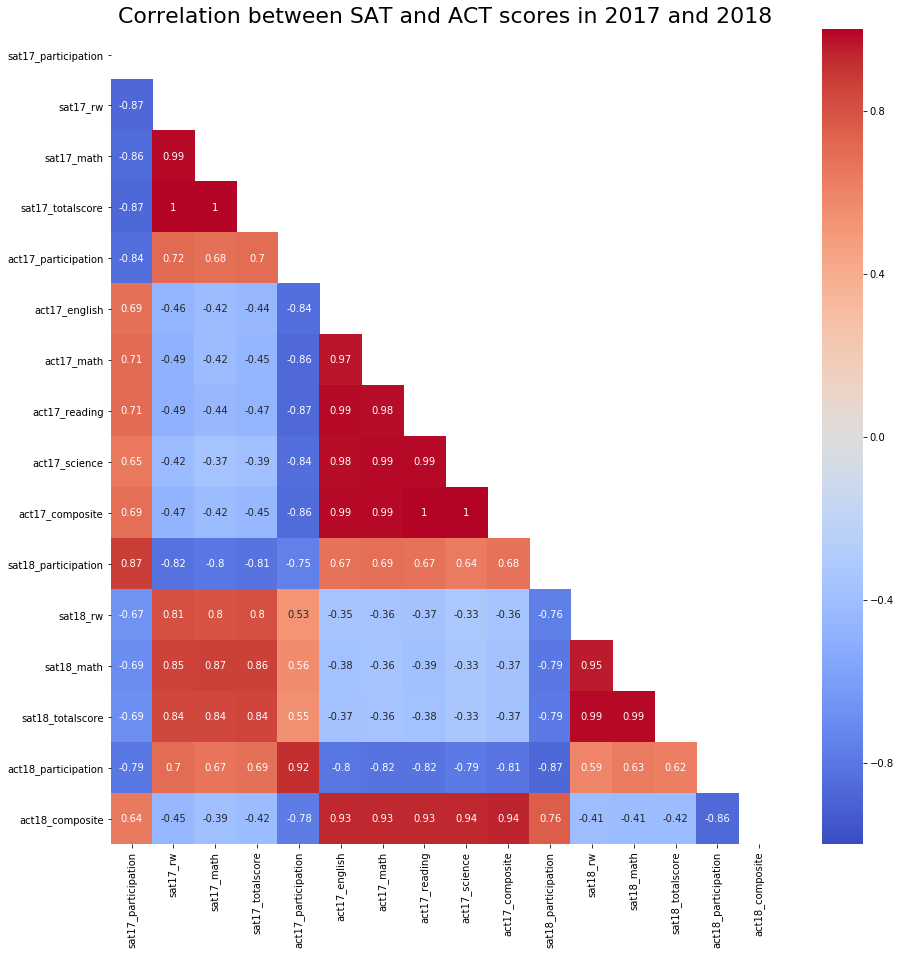

In [55]:
plt.figure(figsize =(15, 15))

mask = np.zeros_like(scores_1718.corr())
mask[np.triu_indices_from(mask)] = True

plt.title('Correlation between SAT and ACT scores in 2017 and 2018',
          size = 22,
          color = 'black')

sns.heatmap(scores_1718.corr(), mask = mask, annot = True, cmap='coolwarm', vmin = -1, vmax=1);

In [76]:
state_test = pd.read_csv("..\\data\\state_test_data.csv")


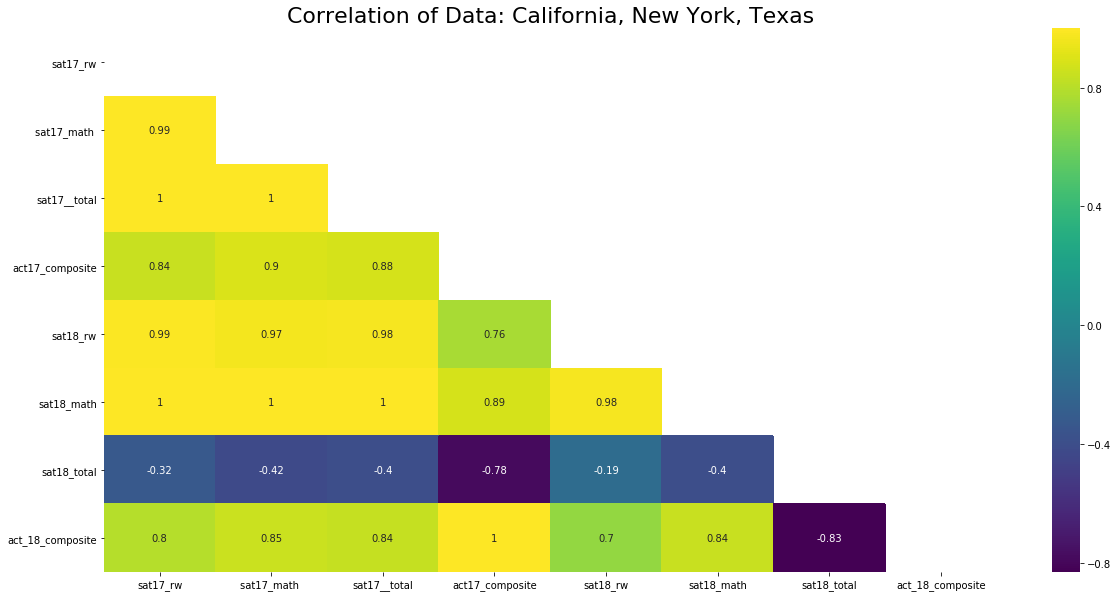

In [77]:
plt.figure(figsize =(20, 10))

mask = np.zeros_like(state_test.corr())
mask[np.triu_indices_from(mask)] = True


plt.title('Correlation of Data: California, New York, Texas',
          size = 22,
          color = 'black')

sns.heatmap(state_test.corr(), annot = True, mask = mask, cmap='viridis',
           vmax=1);


In [104]:
sat_act = pd.read_csv("..\\data\\sat_act.csv")


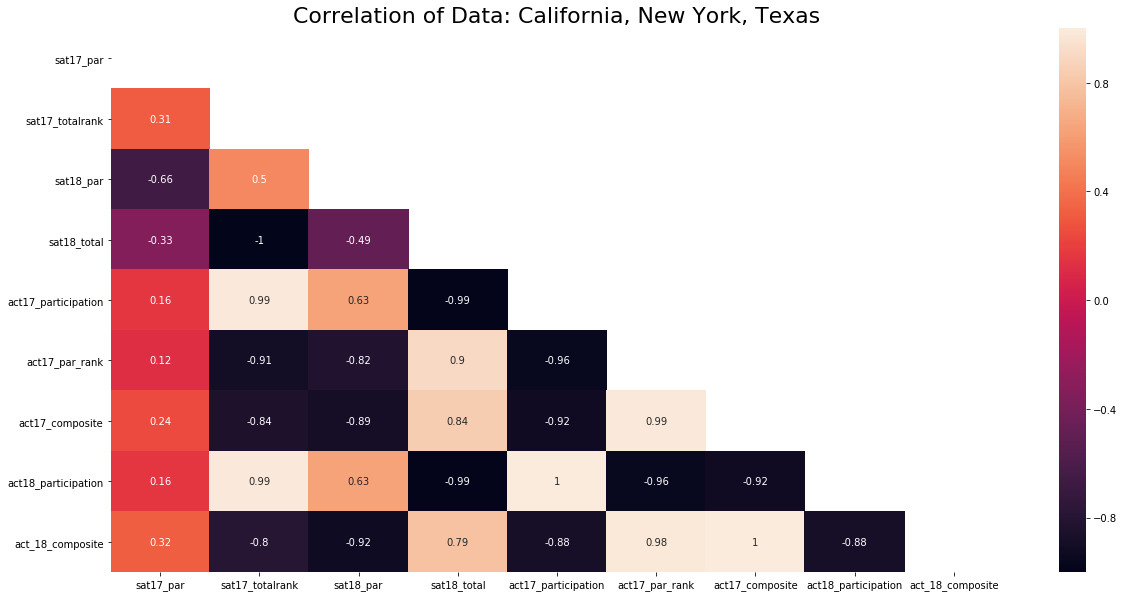

In [105]:
plt.figure(figsize =(20, 10))

mask = np.zeros_like(sat_act.corr())
mask[np.triu_indices_from(mask)] = True


plt.title('Correlation of Data: California, New York, Texas',
          size = 22,
          color = 'black')

sns.heatmap(sat_act.corr(), annot = True, mask=mask,
           vmax=1);

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [58]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels, list_of_colors):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(10,10)) # You'll want to specify your figsize
    
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column], color = list_of_colors[i]) # adding in list of colors
        
    for i, title in enumerate(list_of_titles): # Gives us an index value to get into all our titles
        ax[i].set_title(title)
        
    for i, x_labels in enumerate(list_of_xlabels): # Gives us an index value to get into all our x labels
        ax[i].set_xlabel(x_labels) 
    
#     for i, y_labels in enumerate(list_of_ylabels): # Gives us an index value to get into all our x labels
#         ax[i].set_ylabel(y_labels) 

#worked with Sibel


#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

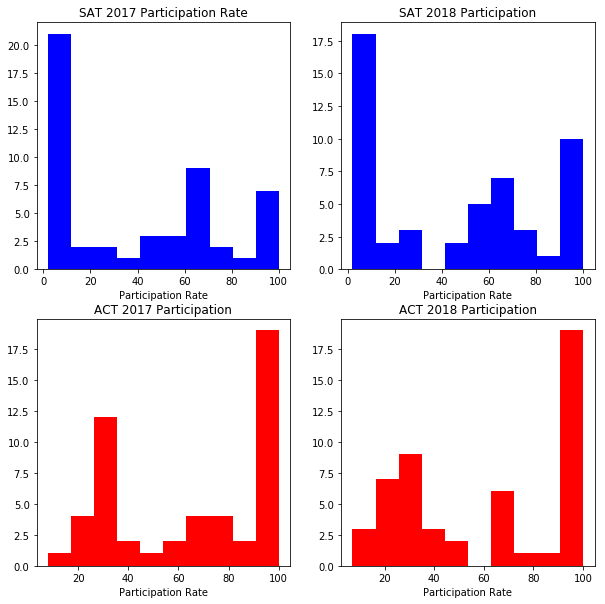

In [59]:
#Participation rates for 17/18 SAT and 17/18 ACT

subplot_histograms(scores_1718, ['sat17_participation', 'sat18_participation', 
                                 'act17_participation', 'act18_participation'],
                                  ['SAT 2017 Participation Rate', 'SAT 2018 Participation', 
                                   'ACT 2017 Participation', 'ACT 2018 Participation'],
                                  ['Participation Rate', 'Participation Rate', 
                                   'Participation Rate', 'Participation Rate'],
                                  ['blue', 'blue', 'red', 'red'])


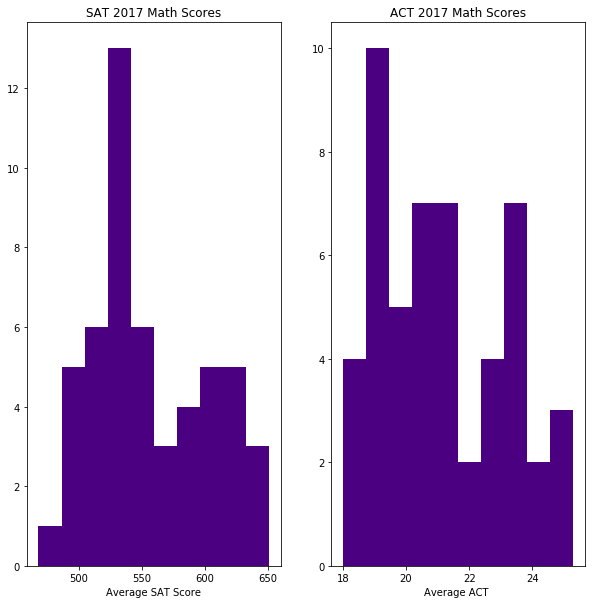

In [60]:
#math scores for SAT & ACT
#SAT 17/act17 math - there is no report for act 18 math
subplot_histograms(scores_1718, ['sat17_math', 'act17_math'],
                  ['SAT 2017 Math Scores', 'ACT 2017 Math Scores'],
                  ['Average SAT Score', 'Average ACT '],
                  ['#4B0082', '#4B0082'])

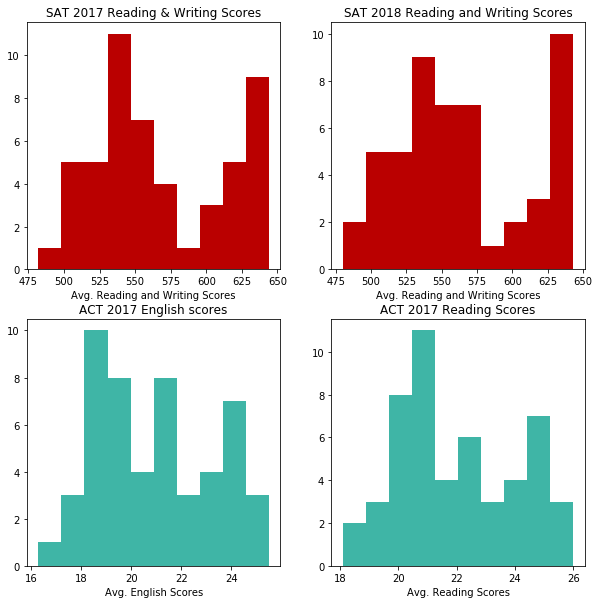

In [61]:
#reading and verbal scores for SAT and ACT
#ther is no report for act reading/writing
subplot_histograms(scores_1718, ['sat17_rw', 'sat18_rw', 'act17_english', 'act17_reading'],
                  ['SAT 2017 Reading & Writing Scores', 'SAT 2018 Reading and Writing Scores', 'ACT 2017 English scores', 'ACT 2017 Reading Scores'],
                  ['Avg. Reading and Writing Scores', 'Avg. Reading and Writing Scores', 'Avg. English Scores', 'Avg. Reading Scores'],
                  ['#ba0000', '#ba0000', '#3fb5a6', '#3fb5a6'])

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


Text(0.5, 0, '2017 SAT Math Scores')

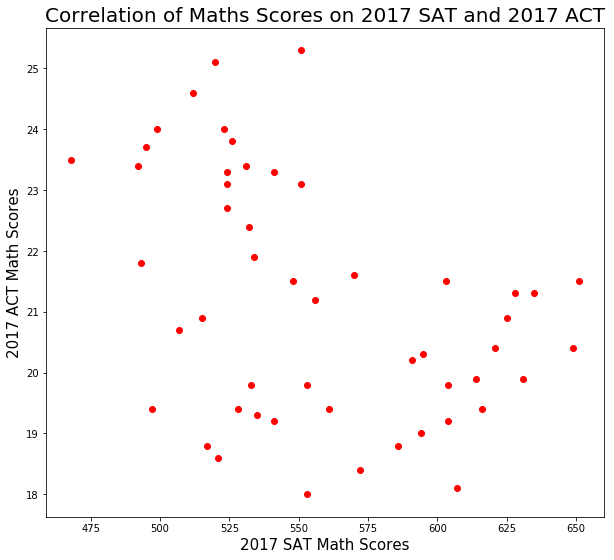

In [62]:
#sat 2017 and act 2017 math scores
plt.figure(figsize=(10, 9))

plt.scatter(scores_1718['sat17_math'], scores_1718['act17_math'], color = 'red')

plt.title('Correlation of Maths Scores on 2017 SAT and 2017 ACT', fontsize = 20)
plt.ylabel('2017 ACT Math Scores', fontsize = 15)
plt.xlabel('2017 SAT Math Scores', fontsize = 15)

Text(0.5, 0, '2017 SAT Reading & Writing Scores')

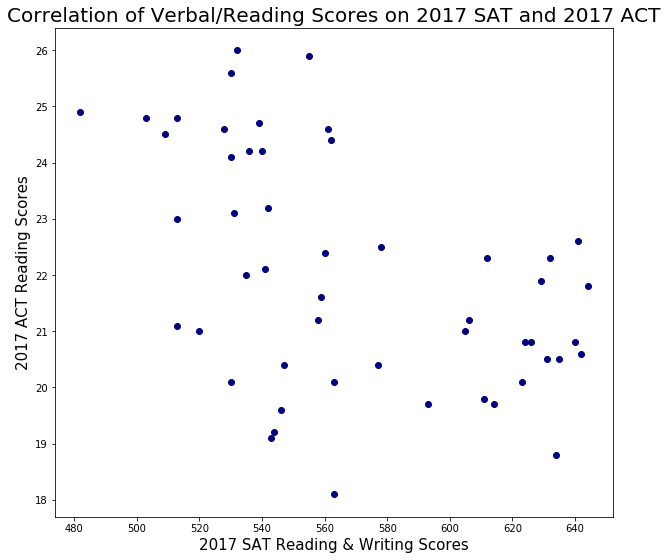

In [63]:
#2017 verbal and reading scores
plt.figure(figsize=(10, 9))

plt.scatter(scores_1718['sat17_rw'], scores_1718['act17_reading'], color = 'navy')

plt.title('Correlation of Verbal/Reading Scores on 2017 SAT and 2017 ACT', fontsize = 20)
plt.ylabel('2017 ACT Reading Scores', fontsize = 15)
plt.xlabel('2017 SAT Reading & Writing Scores', fontsize = 15)

Text(0.5, 0, '2017 SAT Total Average Scores')

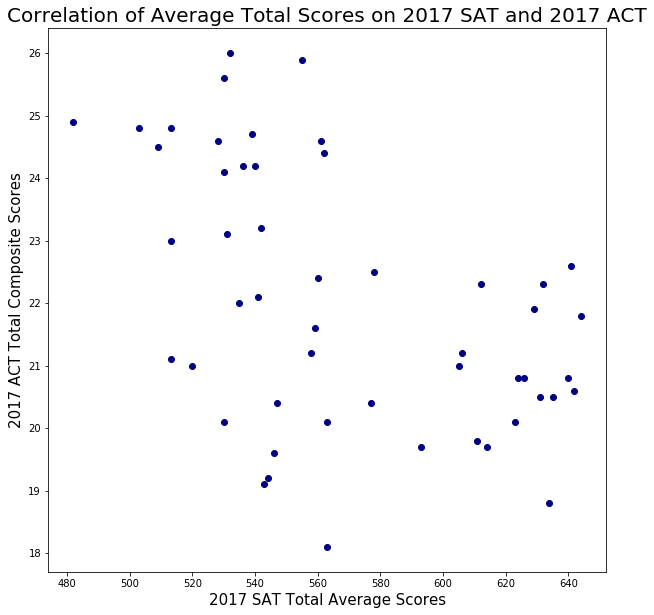

In [64]:
#2017 SAT/ACT total/composite score
plt.figure(figsize=(10, 10))

plt.scatter(scores_1718['sat17_rw'], scores_1718['act17_reading'], color = 'navy')

plt.title('Correlation of Average Total Scores on 2017 SAT and 2017 ACT', fontsize = 20)
plt.ylabel('2017 ACT Total Composite Scores', fontsize = 15)
plt.xlabel('2017 SAT Total Average Scores', fontsize = 15)


Text(0.5, 0, '2017 SAT Total Scores')

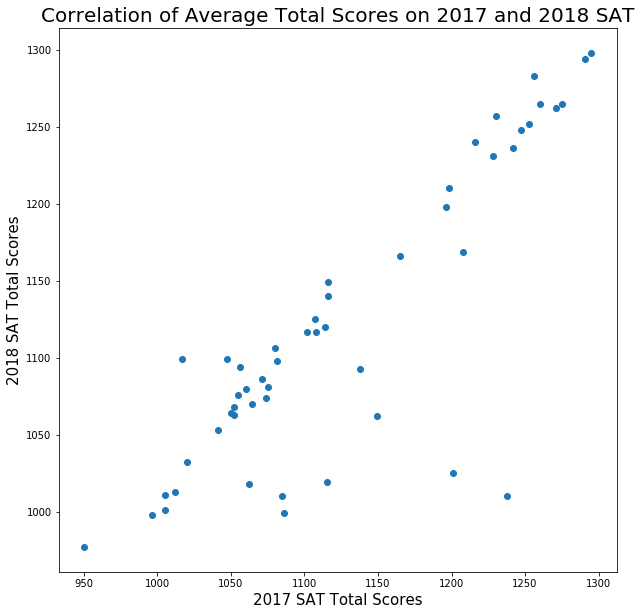

In [65]:
#total scores for 2017 SAT and 2018 SAT

plt.figure(figsize = (10,10))
plt.scatter(scores_1718['sat17_totalscore'], scores_1718['sat18_totalscore'])

plt.title('Correlation of Average Total Scores on 2017 and 2018 SAT', size =20)
plt.ylabel('2018 SAT Total Scores', size = 15)
plt.xlabel('2017 SAT Total Scores', size = 15)

Text(0.5, 0, '2017 ACT Composite Scores')

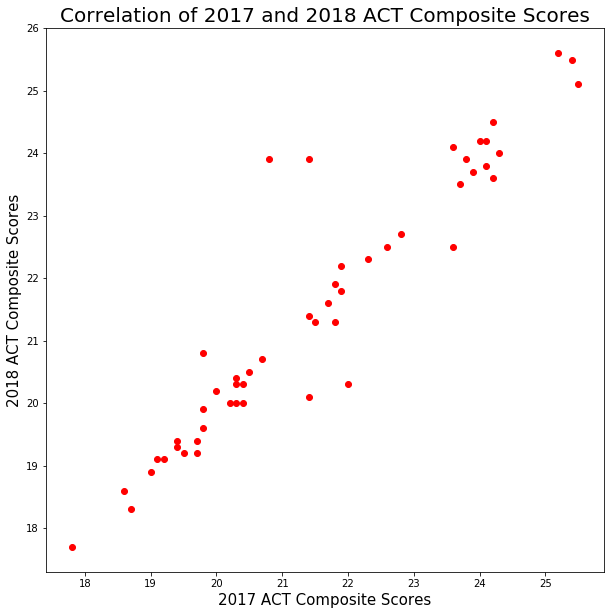

In [66]:
#ACT Composite scores in 2017and 2018
plt.figure(figsize = (10,10))

plt.scatter(scores_1718['act17_composite'], scores_1718['act18_composite'], color= 'red')

plt.title('Correlation of 2017 and 2018 ACT Composite Scores', size =20)
plt.ylabel('2018 ACT Composite Scores', size = 15)
plt.xlabel('2017 ACT Composite Scores', size = 15)

Text(0.5, 0, '2018 SAT Participation Scores')

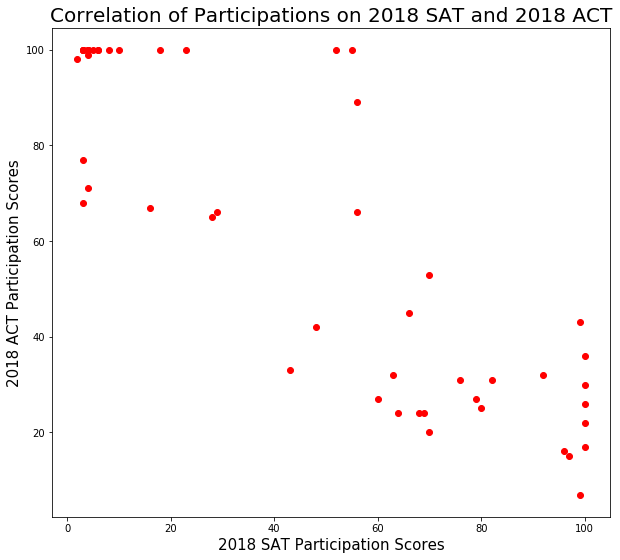

In [67]:
plt.figure(figsize=(10, 9))

plt.scatter(scores_1718['sat18_participation'], scores_1718['act18_participation'], color = 'red')

plt.title('Correlation of Participations on 2018 SAT and 2018 ACT', fontsize = 20)
plt.ylabel('2018 ACT Participation Scores', fontsize = 15)
plt.xlabel('2018 SAT Participation Scores', fontsize = 15)

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

In [68]:
# import pandas
import pandas as pd
# import matplotlib
import matplotlib.pyplot as plt
# import seaborn
import seaborn as sns
%matplotlib inline

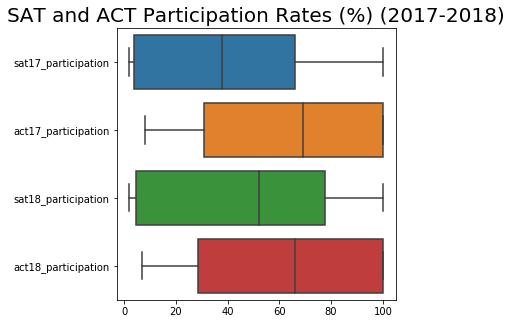

In [69]:
plt.figure(figsize = (5,5))
participation_rates = scores_1718[['sat17_participation', 'act17_participation', 
                                   'sat18_participation', 'act18_participation']]
sns.boxplot(data = participation_rates, orient='h')

plt.title('SAT and ACT Participation Rates (%) (2017-2018)', size = 20);
#help from De'Varus May

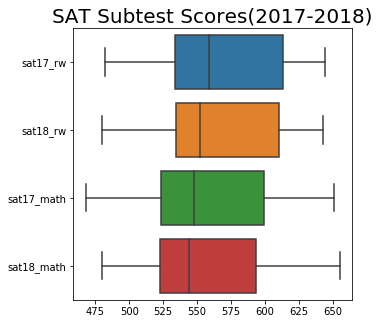

In [70]:
plt.figure(figsize = (5,5))
participation_rates = scores_1718[['sat17_rw', 'sat18_rw', 
                                   'sat17_math', 'sat18_math']]
sns.boxplot(data = participation_rates, orient='h')

plt.title('SAT Subtest Scores(2017-2018)', size = 20);

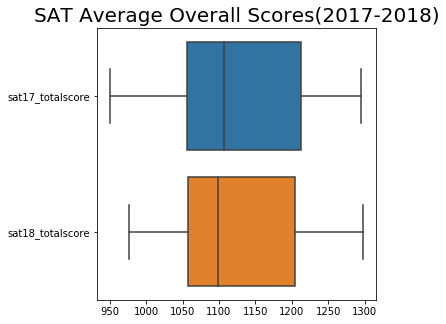

In [71]:
plt.figure(figsize = (5,5))
participation_rates = scores_1718[['sat17_totalscore', 'sat18_totalscore']]

sns.boxplot(data = participation_rates, orient='h')

plt.title('SAT Average Overall Scores(2017-2018)', size = 20);

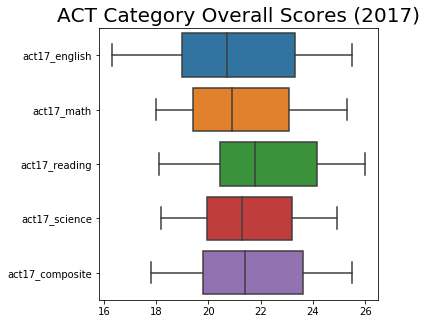

In [72]:
plt.figure(figsize = (5,5))
participation_rates = scores_1718[['act17_english', 'act17_math',
                                  'act17_reading', 'act17_science', 'act17_composite']]

sns.boxplot(data = participation_rates, orient='h')

plt.title('ACT Category Overall Scores (2017)', size = 20);

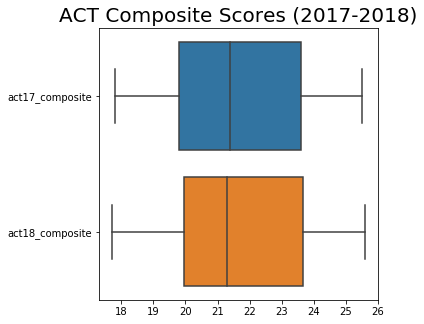

In [73]:
plt.figure(figsize = (5,5))
participation_rates = scores_1718[['act17_composite', 'act18_composite']]

sns.boxplot(data = participation_rates, orient='h')

plt.title('ACT Composite Scores (2017-2018)', size = 20);

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

Answers:

<b>Participation Rates:</b>
Between 2017 and 2018, ACT participation rates are close to exact across the board. There were some states that raised and lowered their participation rates between the two years but it wasn't statistically significant enough to change the overall spread of the distirbution. ACT testing in both years are skewed to the left. 2017 participation has an IQR of 69% while 2018 has an IQR of 71.5%. The overall average(mean) in 2017 was 65% and in 2018 theaverage was 61%. This shows that there was more of a spread of participation rates in 2018.


On the other hand, SAT partication rates made a noticiable change between 2017 and 2018. Both years had a minimum participation rate of 2% and a maximum participation rate of 100%. The overall average participation in 2017 was 39.8%. In 2018, the average participation jumped to 45%. The 2017 IQR was 62% and in 2018 the IQR was 69%. Between the means the and IQR, we can assume that many states raised their participation rates of the SAT 


The spreads of the SAT participation rates in 2017 and 2018 is much larger than the spreads of ACT participation. IN addition, the minimum value of participation for the ACT is greater than the SAT for both years. For both years, the 75th percentile for participation rates of the population was at 100% while the SAT held at 66%(2017) and 71.5%(2018). This shows that the ACT is overall more popular compared to the SAT.

<b>SAT Subtest Scores 2017-2018</b>

The spread of numbers in the SAT reading and writing section is very consistent. Both means are within 6 points of each other. The minimum and maximum of both years are within 2 points of each other. For both years overall average of the SAT math section was 556. Though the averages are similar, the spread of data changed. In 2017, the minimum average value in math was 468. In 2018, the minimum average was 480. At least one state improved their overall math scores.

<b>SAT Average Overall Score 2017-2018</b>

Above we observed that that there not many changes in the subject categories between the years. Because of this, we can expect the overall spread of scores between the two years are also similar. The overall average in 2017 is 1126 and in 2018 is 1120. There is a slight decrease in ovreall scores. In 2017, the lowest average SAT score was 950. In 2018, the lowest average is 977. Even though the overall average in 2017 is higher, the spread of average scores in 2018 is less than 2017. There was at least one state that increased their overall average to improve this spread.

<b>2017 ACT Subtests</b>

Most ACT subjects has a minimum score above 18 and an average score above 21. Math, Reading, and Science, have similar spreads. The subject with the largest spread of scores is English. English has a minimum average score of 16.3 and overall average of 20.9.

There is no 2018 ACT subject data to compare.

<b>Overall ACT Average (2017-2018)</b>
The overall ACT average is very similar. 2017 has a minimum score of 17.8, a maximum score of 25.5, and an average score of 21.5. 2018 has a minimum score of 17.7, a maximum score of 25.6, and an average score of 21.49. There is no significant change in scores between the two years.

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

<b>Answer:</b>
In some cases we do. The SAT and ACT scores are slightly skewed to the right but hold close to a normal distribution. This is true for all test subjects in SAT and ACT.


The only measures that are significantly skewed are the participation rates of the states. Even if we had a larger sample of our population, we could not have a normal distribution because more states would have a higher percentage. 

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

<b>Answer:</b>
We can conduct a statistical inference on the participation data. I believe there would be some correlation between high participation rates for one test in a state and then low participation rates for the other test. 

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

<b>Answer:</b>
No. The SAT and ACT tests are graded on a significantly different scale. The only way to compare the scores is if we measured the spread of the averages based on each tests' minimum and maximum scores. Even if we did that, the ACT math scores would appear to be a lesser spread because it is graded on a scale of 1-36 points while each SAT subject is graded on a scale of 200-400 points.

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

<b>1. California</b>

California has the highest population of all states and the most public univiersities. (https://www.worldatlas.com/articles/which-state-has-the-most-colleges.html ). In 2017, California was ranked 23rd for participation rate at 53%. In 2018, California was still ranked 23rd but had a higher SAT participation rate at 60%. This shows this means that the overall rate of participation was higher for all states in 2018. Though California maintained the same ranking for participation rate between the years, the state jumped up spots for reading and writing, math, and overall SAT score. The rankings for reading and writing jumped from 41 to 37. The math ranking jumped from 38 to 32. The overall score rankng jumped from 40 to 33. 

THe ACT participation rate dropped from 31% in 2017 to 27% in 2018. The ACT rankings for participation dropped from 39th to 41st. However, the ACT overall score maintained at the same level at 16th in 2017 and 17th in 2018 with a difference of 0.1 in score. Between the two tests, we can see that when the ACT participation rate dropped, the SAT participation rank jumped up in ranks. California is in high ranks for the ACT. In the subtests, California ranked significantly higher in the ACT compared to the SATs in 2017.

Compess Press Education published an article calling a "curious case (on) California." (https://www.compassprep.com/great-to-good-the-diluted-value-of-high-test-scores/) Between 2017 and 2018 I highlighted that California had an overall rise in SAT participation rates, rankings for all subject tests, and overall total score. California students showed an interesting case of test-taker behavior. The SAT changed their format in 2017 and students seemed to divert to the ACT. But in 2018, the new class seemed to return back to taking the SAT.

<b>2. Alaska</b>

I wanted to look at the data for Alaska since it is one the least populated states but the largest state geographically (http://worldpopulationreview.com/states/). The SAT participation rates jumped from 38% to 43% in 2017-2018. The rankings for participation dropped from 27th to 29th. Again, this is probably because of an overall increase across states to take the SAT. Alaska's reading & writing and math score in 2017 was ranked at 30th and 32nd. In 2018, the rankings jumped to 2th and 27th. The overall average score jumped from 29th to 24th between the two years. So the rise in participation did not affect the overall scores of the SAT.

Alaska's ACT participation rate dropped from 65% to 33% between 2017 and 2018. Similar to California, as the ACT participation rate dropped, the SAT participation rate jumped. This improved the overall ACT score from 19.8 to 20.8, making the state ranking jump from 39th to 28th. Unlike California, Alaska was ranked lower in the ACT subtests compared to the SAT subtests. 

<b>3. Illinois</b>

I wanted to look at Illinois' data because it has a drastic participation rate of both states among the tests. In 2017, Illinois had a SAT Participation rate at 9% and an ACT participation rate of 93%. In 2018, the SAT participation rate jumped to 99% and the ACT participation rate dropped to 43%. The overall exam rankings has a negative correlation with the participation rate. Though the participation rates for the SAT exam jumped, the overall SAT score ranking dropped from 24th to 43rd. The overall score for the ACT jumped from 26th to 10th place with a 50% drop in participation. 

According to the Chicago Tribune (https://www.chicagotribune.com/news/breaking/ct-met-illinois-act-test-scores-20181016-story.html), before 2018, the state was paying for all high school juniors and seniors to take the ACT. In 2018, the state was no longer paying for the ACT exam as they transitioned over to the SAT as the college entrance exam of choice. 

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

<b>1. </b>

We are missing the ACT subject score data from 2018. This makes our analysis difficult for how states performed in individual subjects. If we had ACT data, we could compare spread, the skew of graphs, and if the states performed negatively or positively between both years. Even though we have composite scores for both years, I wouldn't assume that the spread of the subject score performances stayed the same.

<b>2. </b>

The College Board should focus on funding the states with the most colleges and universities. California, New York, and Texas have over 200 colleges in their state and the participation rate for the SAT was below 70% each year with the exception of New York in 2018. All 3 states rank below 50% on ACT exam participation. This shows us there is the states have no ties with the ACT exam.